In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

### Multi task plotting

In [58]:
# Read in all cancer data
cancers_df = pd.read_csv('../Cancers.csv').iloc[:,1:]

In [2]:
model_paths = sorted(glob.glob('../tensorboard_runs/MT_ST_compare_*/*'))
all_results = {}
all_results['f1s'] = pd.DataFrame()
all_results['recalls'] = pd.DataFrame()

for f in model_paths:
    try:
        dict_ = np.load(f+'/results.npy', allow_pickle = True).item() 
        df = {}
        df['f1s'] = {}
        df['recalls'] = {}
        for k,v_dict in dict_.items():
            df['f1s'][k] = []
            df['recalls'][k] = []
            for v in v_dict:
                df['f1s'][k].append(v['f1'])
                df['recalls'][k].append(v['recall'])
        
        df['f1s'] = pd.DataFrame(df['f1s'])
        df['f1s'] = df['f1s'].melt(var_name=['Disease'], value_name='F1')
        df['f1s']['model'] = ''.join(f.split('/')[-2:]).strip('HO_')
        
        df['recalls'] = pd.DataFrame(df['recalls'])
        df['recalls'] = df['recalls'].melt(var_name=['Disease'], value_name='Recall')
        df['recalls']['model'] = ''.join(f.split('/')[-2:]).strip('HO_')
                     
        all_results['f1s'] = all_results['f1s'].append(df['f1s'])
        all_results['recalls'] = all_results['recalls'].append(df['recalls'])
    except:
        pass

In [15]:
MT_df_ = all_results['recalls'][all_results['recalls']['model']=='MT_ST_compare_MTGEO_GCN_Decagon_feats']
ST_df_ = all_results['recalls'][all_results['recalls']['model']=='MT_ST_compare_STGEO_GCN_Decagon_feats']

MT = MT_df_.groupby('Disease').mean()
ST = ST_df_.groupby('Disease').mean()

In [97]:
plot_df = MT-ST
plot_df['size']=cancers_df.sum().values
plot_df=plot_df.reset_index()
plot_df = plot_df.sort_values('size')
plot_df['Order']=list(range(len(plot_df)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(0, 1.2)

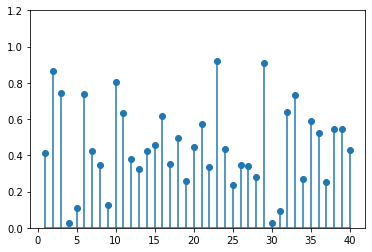

In [102]:
# create data
x=range(1,41)
values=np.random.uniform(size=40)

# stem function: first way
plt.stem(x, values)
plt.ylim(0, 1.2)
#plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
No handles with labels found to put in legend.


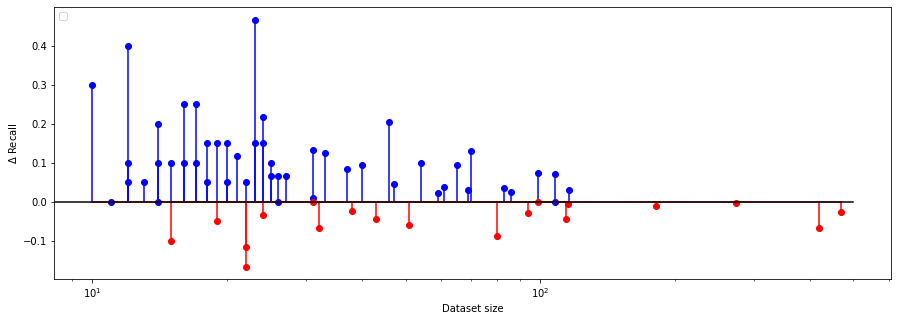

In [111]:
plt.figure(figsize=[15,5])
pos_df = plot_df[plot_df['Recall']>=0]
neg_df = plot_df[plot_df['Recall']<0]

(markers, _, _) = plt.stem(pos_df['size'],pos_df['Recall'], 'blue')
plt.setp(markers, markeredgecolor="blue", markerfacecolor='blue')

(markers, _, _) = plt.stem(neg_df['size'],neg_df['Recall'], 'red')
plt.setp(markers, markeredgecolor="red", markerfacecolor='red')

plt.plot([0,500],[0,0], 'black')
plt.ylabel(r'$\Delta$ Recall')
plt.xscale('log')
plt.xlabel('Dataset size')
plt.legend(loc=2)

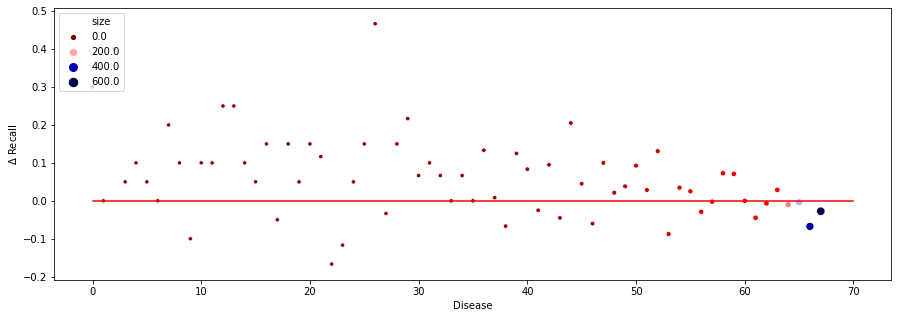

In [98]:
plt.figure(figsize=[15,5])
sns.scatterplot(x='Order',y='Recall',size='size', hue='size',palette='seismic_r',data=plot_df)
plt.plot([0,70],[0,0], 'red')
plt.ylabel(r'$\Delta$ Recall')
plt.xlabel('Disease')
plt.legend(loc=2)

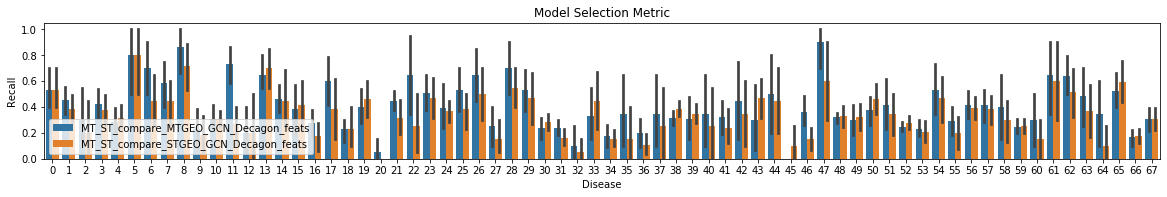

In [5]:
plt.figure(figsize=[20,2.5])
ax = sns.barplot(x='Disease', y='Recall', data=all_results['recalls'], hue='model')
plt.title('Model Selection Metric')
plt.legend(loc=3)

### Previous model plots

In [49]:
special_names = ['5000epoch','single_task_rerun']
special_models = [['..'+i.strip('results.npy') for 
                  i in glob.glob('../tensorboard_runs/*'+s+'/*.npy')][0] for s in special_names]

In [50]:
special_models

['../tensorboard_runs/5000epoch/', '../tensorboard_runs/single_task_rerun/']

In [3]:
special_names_2 = ['LR001', 'LR0001', 'LR0001_2k']
special_models.extend([['..'+i.strip('results.npy') for 
                  i in glob.glob('../tensorboard_runs/single_task/*'+s+'/*.npy')][0] for s in special_names_2])
special_names.extend(special_names_2)

In [51]:
req_len = 68
models = []
#models = ['..'+i.strip('results.npy')
#             for i in glob.glob('../tensorboard_runs/single_task/04-05*/*.npy')]
models.extend(special_models)

run_dicts = [np.load(i+'results.npy', allow_pickle=True).item() 
             for i in models]

idx = [it for it,r in enumerate(run_dicts) if len(r)==req_len or len(r)==38]
models=np.array(models)[idx]
run_dicts = np.array(run_dicts)[idx]

model_names = [glob.glob(i+'*_*')[0].split('/')[-1] 
             for i in models]

for it in range(-1,-3,-1):
    model_names[it] = model_names[it]+special_names[it]

In [52]:
f1s = {}
recalls = {}
#for i in range(len(run_dicts[0])):
for i in range(38):
    f1s[i] = []
    recalls[i] = []

for dict_ in run_dicts:
    for k,v in dict_.items():
        if k == 38:
            break
        try:
            f1s[k].append(v[0]['f1'])
            recalls[k].append(v[0]['recall'])
        except:
            f1s[k].append(v['f1'])
            recalls[k].append(v['recall'])

### Comparing results across models

In [53]:
def plot_scatter(df, baseline, ticks, label=None, title=None):
    df['name'] = ticks
    df = df.sort_values('name')
    ticks = df['name'].values
    df = df.drop('name',1)
    
    plt.scatter(x=range(len(df)),y=df.median(1),color='b')
    plt.scatter(x=range(len(df)),y=df.mean(1),color='g')
    plt.plot([0,len(df)],[baseline,baseline],'r')
    plt.ylim([0,0.8])
    plt.xlabel('Models')
    plt.ylabel(label)
    plt.title(title)
    
    plt.xticks(list(range(len(ticks))), ticks, rotation=90)
    plt.legend(['Aggarwal baseline','Median','Mean'])
    

Text(0, 0.5, 'Recall')

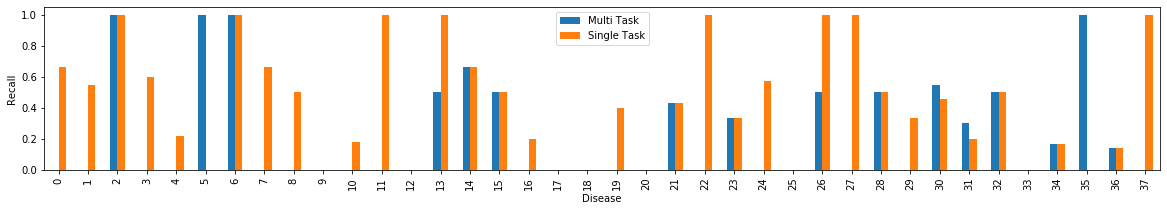

In [56]:
pd.DataFrame(recalls).T.plot.bar()
fig = plt.gcf()
fig.set_size_inches(20, 3)
plt.legend(['Multi Task','Single Task'])
plt.xlabel('Disease')
plt.ylabel('Recall')

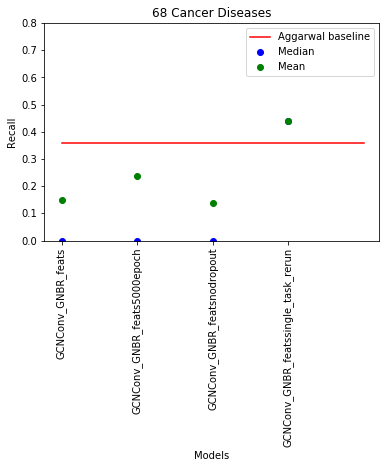

In [24]:
plot_scatter(pd.DataFrame(recalls),0.36, model_names, label='Recall', title='68 Cancer Diseases')

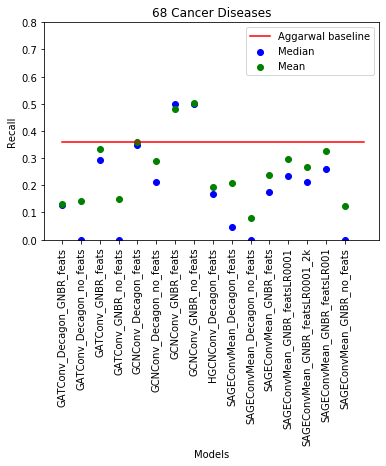

In [40]:
plot_scatter(pd.DataFrame(recalls),0.36, model_names, label='Recall', title='68 Cancer Diseases')

In [60]:
list(zip(range(len(model_names)),model_names))

[(0, 'GCNConv_Decagon_feats'),
 (1, 'SAGEConvMean_Decagon_feats'),
 (2, 'GATConv_GNBR_feats'),
 (3, 'GATConv_Decagon_no_feats'),
 (4, 'SAGEConvMean_GNBR_feats'),
 (5, 'SAGEConvMean_GNBR_no_feats'),
 (6, 'GCNConv_GNBR_no_feats'),
 (7, 'GATConv_Decagon_GNBR_feats'),
 (8, 'GCNConv_GNBR_feats'),
 (9, 'SAGEConvMean_Decagon_no_feats'),
 (10, 'GCNConv_Decagon_no_feats')]

### Comparing same model runs for consistency

In [6]:
recalls_df = pd.DataFrame(recalls).melt()
f1s_df = pd.DataFrame(f1s).melt()

Text(0, 0.5, 'f1s')

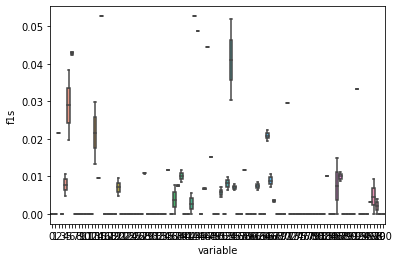

In [7]:
sns.boxplot(data=f1s_df, x='variable', y='value')
plt.ylabel('f1s')

Text(0.5, 0, 'disease')

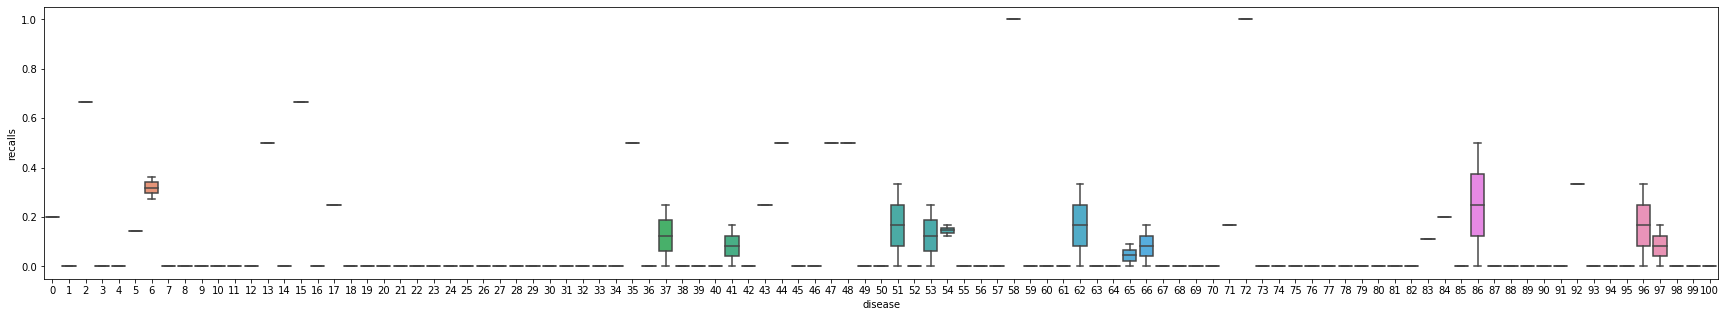

In [15]:
plt.figure(figsize=[30,5])
sns.boxplot(data=recalls_df, x='variable', y='value')
plt.ylabel('recalls')
plt.xlabel('disease')

Text(0.5, 0, 'disease')

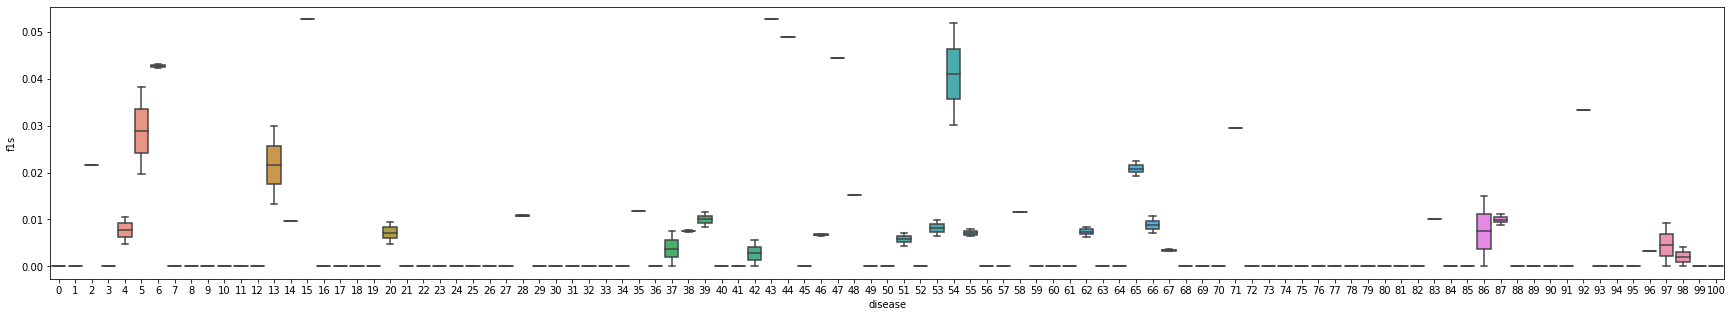

In [16]:
plt.figure(figsize=[30,5])
sns.boxplot(data=f1s_df, x='variable', y='value')
plt.ylabel('f1s')
plt.xlabel('disease')